In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
X = np.random.randn(100,1)*10
noise  = np.random.randn(100,1)
y = 3*X + 1 + 5*noise 

In [111]:
print(X.shape,y.shape)

(100, 1) (100, 1)


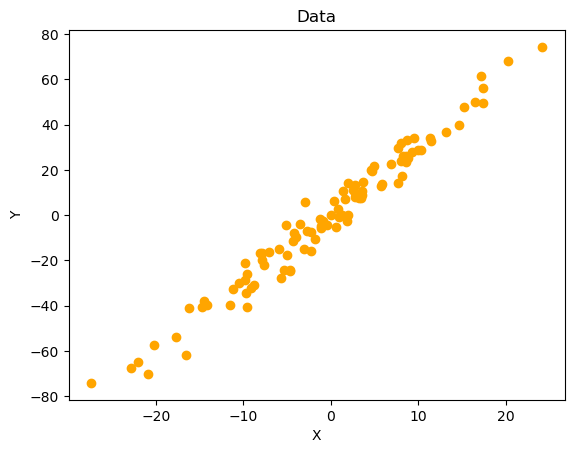

In [112]:
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,y,c="orange")
plt.show()


In [113]:
# Add a bias term to X (X0 = 1)
X_b = np.c_[np.ones((100, 1)), X]
print(X_b.shape, y.shape)

(100, 2) (100, 1)


In [114]:
def model(X,Y,learning_rate, iteration):
    m = Y.size
    theta = np.zeros((2,1))
    for iteration in range(iterations): 
        y_pred = np.dot(X,theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T,y_pred-Y)
        theta = theta - learning_rate*d_theta
    return theta


In [122]:
learning_rate = 0.005
iterations = 100

theta = model(X_b, y,learning_rate = learning_rate,iteration = iterations)

In [123]:
theta

array([[0.13787385],
       [3.02582641]])

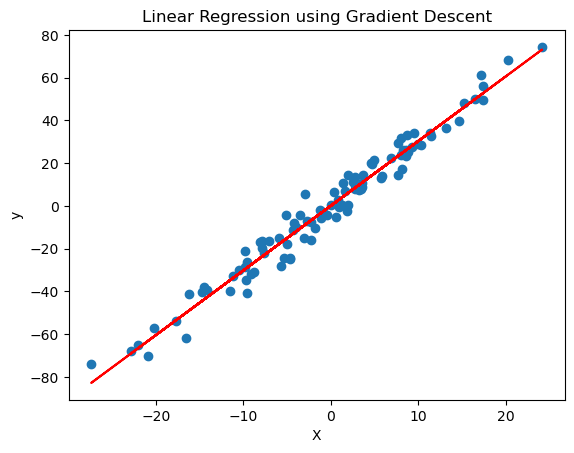

In [124]:
plt.scatter(X, y)
plt.plot(X, np.dot(X_b,theta), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.show()

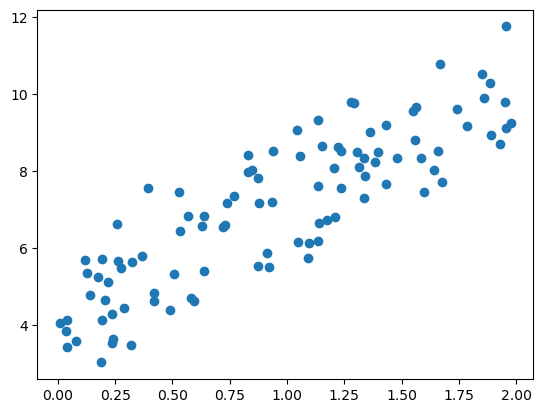

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X,y)
plt.show()

In [76]:
# Add a bias term to X (X0 = 1)
X_b = np.c_[np.ones((100, 1)), X]
#plt.scatter(X_b,y)
#plt.show()
print(X_b.shape, y.shape)

(100, 2) (100, 1)


[[-0.6436184 ]
 [-2.22340315]]
//////
[[ 1.31140928]
 [-0.02952351]]
[[2.46053031]
 [1.25642036]]
[[3.1366326 ]
 [2.00957565]]
[[3.53507957]
 [2.45010298]]
[[3.77052569]
 [2.7072062 ]]
[[3.91025986]
 [2.85670949]]
[[3.99377351]
 [2.94311023]]
[[4.04424453]
 [2.99252112]]
[[4.07527688]
 [3.0202655 ]]
[[4.09485581]
 [3.03533483]]
[[4.10766908]
 [3.04300461]]
[[4.11646921]
 [3.04636961]]
[[4.12287293]
 [3.04724485]]
[[4.12783038]
 [3.04669431]]
[[4.13190046]
 [3.0453413 ]]
[[4.1354124 ]
 [3.04355048]]
[[4.13856063]
 [3.04153482]]
[[4.14146041]
 [3.03941826]]
[[4.14418051]
 [3.03727254]]
[[4.14676239]
 [3.03513879]]
[[4.14923142]
 [3.03304022]]
[[4.15160352]
 [3.03098953]]
[[4.15388902]
 [3.02899332]]
[[4.15609494]
 [3.02705459]]
[[4.15822632]
 [3.0251743 ]]
[[4.16028703]
 [3.0233522 ]]
[[4.16228018]
 [3.02158738]]
[[4.16420846]
 [3.01987857]]
[[4.16607425]
 [3.0182243 ]]
[[4.16787973]
 [3.016623  ]]
[[4.16962695]
 [3.01507309]]
[[4.17131785]
 [3.01357297]]
[[4.17295426]
 [3.01212109]]
[[4

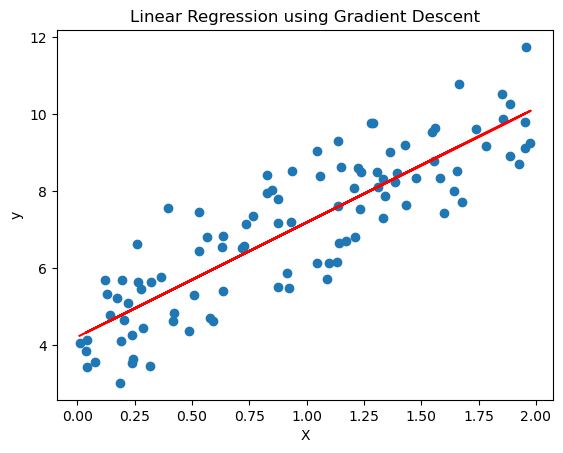

In [77]:

# Gradient Descent Parameters
eta = 0.1  # learning` rate
n_iterations = 100
m = 100  # number of instances

# Initialize theta with random values
theta = np.random.randn(2, 1)
print(theta)
print("//////")
# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    print(theta)
# Final theta values (intercept and slope)
intercept, slope = theta

# Print the final parameters
print("Intercept:", intercept)
print("Slope:", slope)

# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.show()


In [125]:
# Model Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp))**2
    denom = np.sum((y - ymean)**2)
    return 1 - num/denom 

r2Score(y,X_b.dot(theta))

0.9945124615538683

In [128]:
#Regularization Ridge
lambda_reg = 0.1
yp = X_b.dot(theta)
def regularised_mean_error(y,yp, theta, lambda_reg):
    return (1/m)*np.sum((y-yp)**2)+lambda_reg*np.sum((theta[1:])**2)
regularised_mean_error(y,yp, theta, lambda_reg)

29.915401891720624

In [131]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=0.1)
clf.fit(X_b,y)
clf.score(X_b,y)

0.969729953292926

In [132]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_b,y)
clf.score(X_b,y)

0.9697298500899351

In [133]:

def regularised_gradient_descent(X,y, theta, learning_rate, alpha):
    m = len(y)
    gradient = 2/m*X.T.dot(X_b.dot(theta)-y)+ alpha*np.abs(theta[1:])
    theta = learning_rate*gradient
    return theta
alpha = 0.01
regularised_gradient_descent(X_b, y, theta, eta, alpha)

array([[-0.04279007],
       [ 0.00285692]])

In [134]:
#Regularization Ridge
lambda_reg = 0.1
yp = X_b.dot(theta)
def regularised_mean_error(y,yp, theta, lambda_reg):
    return (1/m)*np.sum((y-yp)**2)+lambda_reg*np.sum((theta[1:])**2)
regularised_mean_error(y,yp, theta, lambda_reg)

29.915401891720624